In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
main_df = pd.read_csv('../data/World Energy Consumption.csv')
main_df.head()

In [ ]:
countries = ['New Zealand', 'Canada', 'Australia', 'United Kingdom', 'United States']
filtered_df = main_df[main_df['country'].isin(countries)]
filtered_df

In [ ]:
columns_needed = ['country', 'year', 'primary_energy_consumption', 'renewables_consumption']
data_selected = filtered_df[columns_needed]

# Check for missing values in the selected columns
data_selected.isnull().sum()

In [ ]:
# Drop rows with missing values
data_selected = data_selected.dropna()
data_selected.isnull().sum()

In [ ]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = data_selected[data_selected['country'] == country]
    plt.plot(country_data['year'], country_data['primary_energy_consumption'], label=country)

plt.title('Primary Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Primary Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
for country in countries:
    subset = data_selected[data_selected['country'] == country]
    plt.plot(subset['year'], subset['renewables_consumption'], label=country)

plt.title('Renewables Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Renewables Consumption')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Forcasting the next 5 years
def forecast_energy_consumption(country, target_column, years_to_forecast=6):
    country_data = data_selected[data_selected['country'] == country]
    country_data = country_data.set_index('year')
    serise = country_data[target_column]

    modal = SARIMAX(serise, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    modal_fit = modal.fit(disp=False)

    forecast = modal_fit.forecast(steps=years_to_forecast)
    forecast_years  = np.arange(country_data.index[-1] + 1, country_data.index[-1] + years_to_forecast + 1)

    plt.figure(figsize=(12, 6))
    plt.plot(serise.index, serise.values, label='Actual Data')
    plt.plot(forecast_years, forecast.values, label='Forecast', color='red')
    plt.title(f'{country} {target_column} Forecast')
    plt.xlabel('Year')
    plt.ylabel('Consumption')
    plt.legend()
    plt.grid(True)
    plt.show()

    return forecast

In [56]:
# Check the acuracy of the model
def check_accuracy(country, target_column):
    country_data = data_selected[data_selected['country'] == country]
    country_data = country_data.set_index('year')
    serise = country_data[target_column]

    train_size = int(len(serise) * 0.8)
    train, test = serise[:train_size], serise[train_size:]

    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)

    predictions = model_fit.forecast(steps=len(test))

    mae = mean_absolute_error(test, predictions)
    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    print(f'Mean Absolute Error for {country} {target_column}: {mae}')
    print(f'Mean Squared Error for {country} {target_column}: {mse}')
    print(f'Root Mean Squared Error for {country} {target_column}: {rmse}')

    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train.values, label='Train Data')
    plt.plot(test.index, test.values, label='Test Data', color='green')
    plt.plot(test.index, predictions.values, label='Predictions', color='red')
    plt.title(f'{country} {target_column} Model Accuracy')
    plt.xlabel('Year')
    plt.ylabel('Consumption')
    plt.legend()
    plt.grid(True)
    plt.show()


c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespac

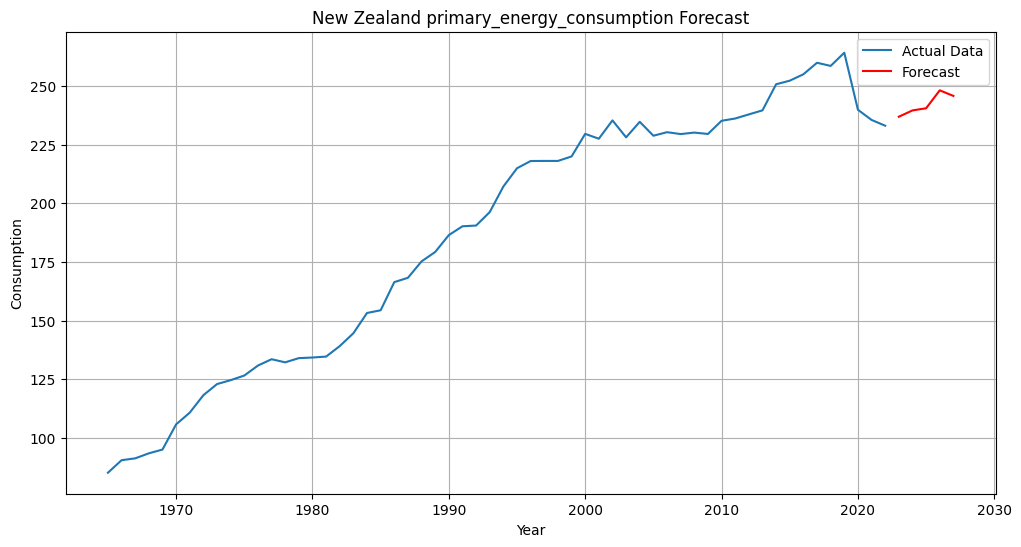

c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\WINDOWS\AppData\Local\Programs\Pytho

Mean Absolute Error for New Zealand primary_energy_consumption: 11.30146627119779
Mean Squared Error for New Zealand primary_energy_consumption: 208.2230208547484
Root Mean Squared Error for New Zealand primary_energy_consumption: 14.429934887405016


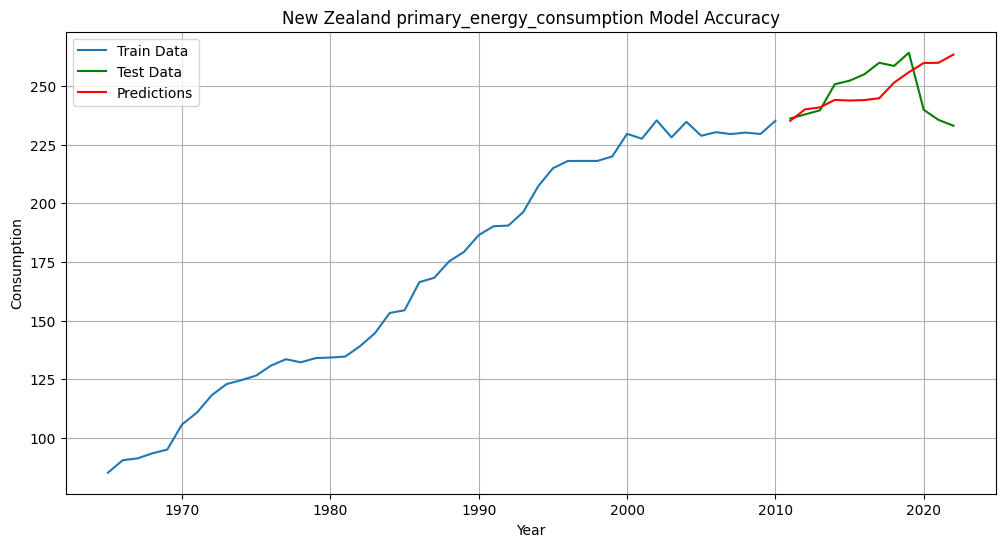

In [57]:
country = 'New Zealand'
target_column = 'primary_energy_consumption'
years_to_forecast = 5
forecast_energy_consumption(country, target_column, years_to_forecast)
check_accuracy(country, target_column)   


In [ ]:
forecast_results = {}
for country in countries:
    forecast_total = forecast_energy_consumption(country, 'primary_energy_consumption', years_to_forecast=5)
    forecast_renewable = forecast_energy_consumption(country, 'renewables_consumption', years_to_forecast=5)

    forecast_results[country] = {
        'total_energy_forecast': forecast_total,
        'renewable_energy_forecast': forecast_renewable
    }

In [ ]:
forecast_results

In [ ]:
summary = []
for country in countries:
    total_forecast = forecast_results[country]['total_energy_forecast']
    renewables_forecast = forecast_results[country]['renewable_energy_forecast']
    summary.append({
        'Country': country,
        '2030 Total Energy (TWh)': total_forecast.iloc[-1],
        '2030 Renewables (TWh)': renewables_forecast.iloc[-1],
        'Renewables Share (%)': (renewables_forecast.iloc[-1] / total_forecast.iloc[-1]) * 100
    })

summary_df = pd.DataFrame(summary)
print("\nProjected Energy Consumption in 2030:")
print(summary_df)